<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/final_%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[연관분석/장바구니 분석](https://paullabworkspace.notion.site/02e35f559f51479983c337ef48cef73a)

# 공통 처리

In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.9 MB/s eta 0:00:00


In [2]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

# 데이처 전처리

In [3]:
df = pd.read_excel('/content/offline_0801.xlsx')
df.head()

,결제일,결제시간,카테고리,상품명,수량,상품별 단가,상품별 합계,분류,Hot/Ice,평균기온(℃),강수량(mm),차량 수,검색량,원두,일별 수량,일별 매출
0,2022-02-10,10:03:28,핸드드립,콜롬비아 로꼬 소르베,1,10500,10500,판매상품,Ice,6.9000,7.2000,15,33.8115,싱글,289,2198900
1,2022-02-10,10:03:28,핸드드립,니카라과 COE#1,1,12000,12000,판매상품,Hot,6.9000,7.2000,15,33.8115,싱글,289,2198900
2,2022-02-10,10:03:28,핸드드립,과테 레드 파카마라,1,10000,10000,판매상품,Hot,6.9000,7.2000,15,33.8115,싱글,289,2198900
3,2022-02-10,10:13:57,시그니처,텐저린 라떼,1,7000,7000,판매상품,Ice,6.9000,7.2000,15,33.8115,쥬시,289,2198900
4,2022-02-10,10:13:57,에스프레소,슈퍼클린,1,6500,6500,판매상품,Hot,6.9000,7.2000,15,33.8115,클래식,289,2198900


In [4]:
df.isnull().sum()

결제일        0
결제시간       0
카테고리       0
상품명        0
수량         0
상품별 단가     0
상품별 합계     0
분류         0
Hot/Ice    0
평균기온(℃)    0
강수량(mm)    0
차량 수       0
검색량        0
원두         0
일별 수량      0
일별 매출      0
dtype: int64

In [5]:
# pd.to_datetime(df['결제일'], format='%Y-%m-%d')

In [6]:
df['결제일'] = pd.to_datetime(df['결제일']).dt.strftime('%Y-%m-%d')
df['결제시간'] = pd.to_datetime(df['결제시간']).dt.strftime('%H:%M:%S')

In [7]:
df['결제일시'] = df['결제일'] + ' ' + df['결제시간']
df['결제일시'] = pd.to_datetime(df['결제일시'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df = df[df['카테고리'].isin(['시그니처', 'Basic _ ice', '디저트', 'Basic', '비버리지'])]

In [9]:
datetime = df[df['카테고리']=='디저트']['결제일시']
datetime

30       2022-02-10 11:39:20
47       2022-02-10 12:02:12
48       2022-02-10 12:02:38
53       2022-02-10 12:05:23
81       2022-02-10 12:51:06
                 ...        
139706   2023-05-31 14:28:05
139714   2023-05-31 14:37:06
139719   2023-05-31 14:38:51
139741   2023-05-31 14:57:55
139764   2023-05-31 15:35:25
Name: 결제일시, Length: 14711, dtype: datetime64[ns]

In [10]:
df2 = df[df['결제일시'].isin(datetime)]
df2.head()

,결제일,결제시간,카테고리,상품명,수량,상품별 단가,상품별 합계,분류,Hot/Ice,평균기온(℃),강수량(mm),차량 수,검색량,원두,일별 수량,일별 매출,결제일시
28,2022-02-10,11:39:20,비버리지,얼그레이 밀크티,1,6500,6500,판매상품,Ice,6.9000,7.2000,15,33.8115,해당없음,289,2198900,2022-02-10 11:39:20
29,2022-02-10,11:39:20,Basic _ ice,아메리카노,1,6000,6000,판매상품,Ice,6.9000,7.2000,15,33.8115,클래식,289,2198900,2022-02-10 11:39:20
30,2022-02-10,11:39:20,디저트,브라우니,1,6500,6500,판매상품,해당없음,6.9000,7.2000,15,33.8115,해당없음,289,2198900,2022-02-10 11:39:20
46,2022-02-10,12:02:12,Basic _ ice,아메리카노,1,6000,6000,판매상품,Ice,6.9000,7.2000,15,33.8115,클래식,289,2198900,2022-02-10 12:02:12
47,2022-02-10,12:02:12,디저트,잠봉뵈르,2,8500,17000,판매상품,해당없음,6.9000,7.2000,15,33.8115,해당없음,289,2198900,2022-02-10 12:02:12


In [11]:
df2 = df2[['결제일시', '상품명', '수량']]
df2

,결제일시,상품명,수량
28,2022-02-10 11:39:20,얼그레이 밀크티,1
29,2022-02-10 11:39:20,아메리카노,1
30,2022-02-10 11:39:20,브라우니,1
46,2022-02-10 12:02:12,아메리카노,1
47,2022-02-10 12:02:12,잠봉뵈르,2
...,...,...,...
139739,2023-05-31 14:57:55,텐저린 라떼,1
139740,2023-05-31 14:57:55,얼그레이 밀크티,1
139741,2023-05-31 14:57:55,브라우니,1
139763,2023-05-31 15:35:25,유자 아메리카노,1


In [12]:
w1 = df2.groupby(['결제일시', '상품명'])['수량'].sum()
w1.head(10)

결제일시                 상품명      
2022-02-10 11:39:20  브라우니         1
                     아메리카노        1
                     얼그레이 밀크티     1
2022-02-10 12:02:12  아메리카노        1
                     잠봉뵈르         2
2022-02-10 12:02:38  브라우니         1
2022-02-10 12:05:23  잠봉뵈르         1
                     플랫화이트        1
2022-02-10 12:51:06  바스크 치즈케이크    1
                     텐저린 라떼       1
Name: 수량, dtype: int64

In [13]:
w2 = w1.unstack().reset_index().fillna(0).set_index('결제일시')
print(w2.shape)
display(w2.head())

(12078, 35)


상품명,(템플)플랫,거제 유기농 유자차,레몬 휘낭시에,무화과 휘낭시에,문경 선암리 사과주스,문경 오미자 차,바닐라라떼,바스크 치즈케이크,브라우니,시나몬 플럼,시나몬 휘낭시에,시나몬플럼,아메리카노,어린이 감귤주스,어린이 우유,얼그레이 밀크티,오미자 에이드,오미자 차,유기농 유자 차,유자 아메리카노,유자 에이드,잠봉뵈르,제주 유기농 감귤주스,제주 유기농 귤피주스,천혜향에이드,카모마일,카페라떼,카푸치노,텐저린 라떼,텐저린 카푸치노,트로피칼 루이보스,패션프루트 에이드,플랫화이트,플레인 휘낭시에,헤이즐넛 휘낭시에
결제일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-10 11:39:20,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2022-02-10 12:02:12,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2022-02-10 12:02:38,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2022-02-10 12:05:23,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2022-02-10 12:51:06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [14]:
basket_df = w2.apply(lambda x: x>0)
display(basket_df.head())

상품명,(템플)플랫,거제 유기농 유자차,레몬 휘낭시에,무화과 휘낭시에,문경 선암리 사과주스,문경 오미자 차,바닐라라떼,바스크 치즈케이크,브라우니,시나몬 플럼,시나몬 휘낭시에,시나몬플럼,아메리카노,어린이 감귤주스,어린이 우유,얼그레이 밀크티,오미자 에이드,오미자 차,유기농 유자 차,유자 아메리카노,유자 에이드,잠봉뵈르,제주 유기농 감귤주스,제주 유기농 귤피주스,천혜향에이드,카모마일,카페라떼,카푸치노,텐저린 라떼,텐저린 카푸치노,트로피칼 루이보스,패션프루트 에이드,플랫화이트,플레인 휘낭시에,헤이즐넛 휘낭시에
결제일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-10 11:39:20,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-02-10 12:02:12,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-02-10 12:02:38,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-02-10 12:05:23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2022-02-10 12:51:06,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [15]:
# '결제일시'와 '상품명'을 추출
w3 = df2[['결제일시', '상품명']].drop_duplicates()

# 결제일시와 상품명을 모두 문자열로 변환
w3['결제일시'] = w3['결제일시'].astype('str')
w3['상품명'] = w3['상품명'].astype('str')

# 결제일시를 인덱스로 삼는다
w3 = w3.set_index('결제일시')
display(w3.head(10))

,상품명
결제일시,
2022-02-10 11:39:20,얼그레이 밀크티
2022-02-10 11:39:20,아메리카노
2022-02-10 11:39:20,브라우니
2022-02-10 12:02:12,아메리카노
2022-02-10 12:02:12,잠봉뵈르
2022-02-10 12:02:38,브라우니
2022-02-10 12:05:23,플랫화이트
2022-02-10 12:05:23,잠봉뵈르
2022-02-10 12:51:06,텐저린 카푸치노


In [16]:
w3.groupby('결제일시')['상품명'].sum().str.contains('텐저린 라떼유자 아메리카노').sum() # 553
# w3.groupby('결제일시')['상품명'].sum().str.contains('유자 아메리카노텐저린 라떼').sum() # 176

553

In [17]:
# # 처음 다섯 건의 상품 코드 추출
# item_list1 = w3.index[:5]

# # w3에 대한 검색 결과
# display(w3.loc[item_list1])

# 연관분석 모델링

In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [19]:
# apriori 분석
freq_items1 = apriori(basket_df, min_support = 0.06, use_colnames = True)

# 결과 확인
display(freq_items1.sort_values('support', ascending = False))

# itemset의 수를 확인
print(freq_items1.shape[0])

# 지지도가 0.06이상인 것을 추출하도록 설정되었고, 상품 및 조합이 총 17건이 추출되었습니다.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.3564,(바스크 치즈케이크)
2,0.3352,(브라우니)
7,0.3133,(텐저린 라떼)
3,0.3020,(아메리카노)
8,0.1696,(텐저린 카푸치노)
4,0.1635,(유자 아메리카노)
5,0.1461,(잠봉뵈르)
9,0.1388,(플레인 휘낭시에)
0,0.1346,(무화과 휘낭시에)
11,0.1169,"(바스크 치즈케이크, 텐저린 라떼)"


17


In [20]:
# 연관 분석 - 규칙 추출
# 리프트값이 1이상인 유효한 것만 추출하였고, 내림차순으로 정렬했습니다.
a_rules1 = association_rules(freq_items1, metric = "lift", min_threshold = 1)

# 리프트값을 기준으로 정렬
a_rules1 = a_rules1.sort_values('lift',ascending = False).reset_index(drop=True)

# 결과 확인
display(a_rules1)

# 추출된 규칙 수 확인
print(a_rules1.shape[0])

# 상품번호 23254와 23256, 상품번호 22726 ~ 22728 사이에 강한 관계가 있음을 파악할 수 있습니다.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(유자 아메리카노),(텐저린 라떼),0.1635,0.3133,0.0737,0.4506,1.4384,0.0225,1.2500,0.3643
1,(텐저린 라떼),(유자 아메리카노),0.3133,0.1635,0.0737,0.2352,1.4384,0.0225,1.0937,0.4438
2,(브라우니),(아메리카노),0.3352,0.3020,0.1129,0.3370,1.1156,0.0117,1.0527,0.1559
3,(아메리카노),(브라우니),0.3020,0.3352,0.1129,0.3739,1.1156,0.0117,1.0619,0.1485
4,(바스크 치즈케이크),(텐저린 라떼),0.3564,0.3133,0.1169,0.3281,1.0471,0.0053,1.0220,0.0699
5,(텐저린 라떼),(바스크 치즈케이크),0.3133,0.3564,0.1169,0.3732,1.0471,0.0053,1.0268,0.0656
6,(브라우니),(텐저린 라떼),0.3352,0.3133,0.1073,0.3202,1.0219,0.0023,1.0101,0.0322
7,(텐저린 라떼),(브라우니),0.3133,0.3352,0.1073,0.3425,1.0219,0.0023,1.0112,0.0312
8,(바스크 치즈케이크),(텐저린 카푸치노),0.3564,0.1696,0.0617,0.1731,1.0208,0.0013,1.0043,0.0317
9,(텐저린 카푸치노),(바스크 치즈케이크),0.1696,0.3564,0.0617,0.3638,1.0208,0.0013,1.0117,0.0246


12


In [21]:
# # 관계성이 높은 상품의 상품번호 리스트
# item_list = ['텐저린 라떼', '유자 아메리카노', '아메리카노', '브라우니', '바스크 치즈케이크']

# # 상품명 확인
# for item in item_list:
#     print(item, item_dict[item])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# 리프트값 상위 20개를 대상으로 삼는다
a = a_rules1.head(20)

# 부모 노드 추출
ant = a['antecedents'].values
ant = [tuple(x) for x in ant]

# 자식 노드 추출
con = a['consequents'].values
con = [tuple(x) for x in con]

# 모든 노드를 열거
both = ant + con
both = list(set(both))

# 결과의 일부를 확인
print(both[:10])

[('유자 아메리카노',), ('아메리카노',), ('텐저린 라떼',), ('바스크 치즈케이크',), ('텐저린 카푸치노',), ('브라우니',)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# 부모 노드 추출
ant = a_rules1['antecedents'].values
ant = [tuple(x) for x in ant]

# 자식 노드 추출
con = a_rules1['consequents'].values
con = [tuple(x) for x in con]

# 모든 노드를 열거
both = list(set(ant + con))
both

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('유자 아메리카노',),
 ('아메리카노',),
 ('텐저린 라떼',),
 ('바스크 치즈케이크',),
 ('텐저린 카푸치노',),
 ('브라우니',)]

In [24]:
# 관계 그래프 구성

# networkx 라이브러리 임포트
import networkx as nx

# 관계 그래프 초기화
G = nx.DiGraph()

# 노드 추가
for n in both:
  G.add_node(n)

# 엣지 추가
for i in range(len(a)):
    item = a.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    G.add_edge(ant, con)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


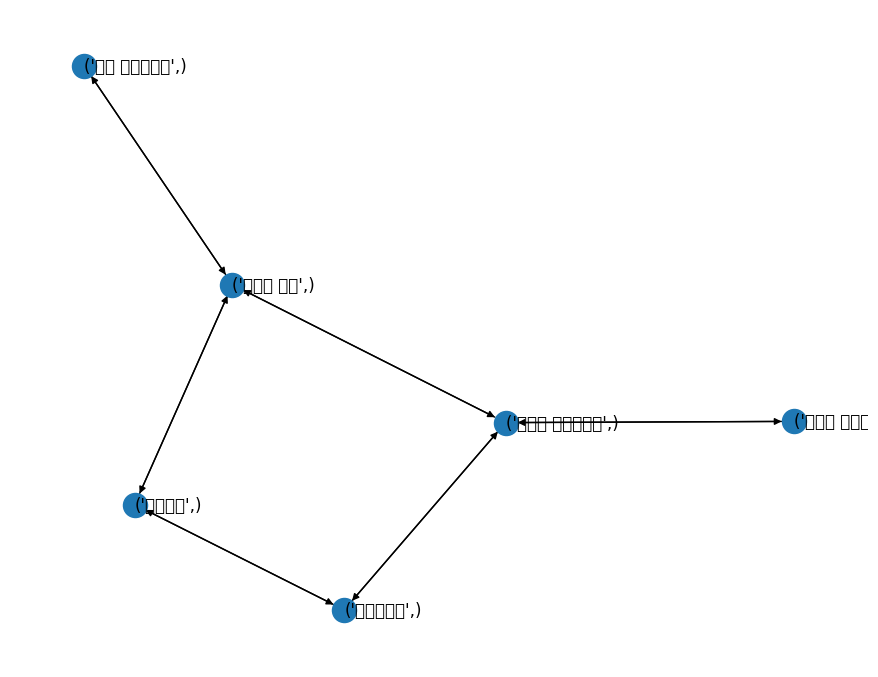

In [25]:
# 그래프 그리기
pos = nx.spring_layout(G, k=0.6, seed=42)

plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, horizontalalignment='left', verticalalignment='center')

plt.axis('off')
plt.tight_layout()
plt.show()

# [('유자 아메리카노',), ('텐저린 라떼',), ('브라우니',),
#  ('아메리카노',), ('바스크 치즈케이크',), ('텐저린 카푸치노',)]

https://app.diagrams.net/#G16U7T--bjP5OBHs6lzaBBedWtboijChdF